In [10]:
import pandas as pd
import matplotlib.pyplot as plt
da1 = pd.read_excel('C:\\Users\\lenovo\\Desktop\\商品销售数据.xlsx',sheet_name=0)
da2 = pd.read_excel('C:\\Users\\lenovo\\Desktop\\商品销售数据.xlsx',sheet_name=1)
df = pd.merge(da1,da2,on='商品编号',how='right')
df['订单日期'] = pd.to_datetime(df['订单日期'])
df['月份'] = df['订单日期'].dt.month
df['销售金额'] = df['商品销售价'] * df['订单数量']
monthly_sales = df.groupby('月份')['销售金额'].sum()
print(monthly_sales)

月份
1     344878.0
2     375111.0
3     431575.0
4     408359.0
5     463358.0
6     424416.0
7     490090.0
8     468356.0
9     433489.0
10    485727.0
11    484643.0
12    470306.0
Name: 销售金额, dtype: float64


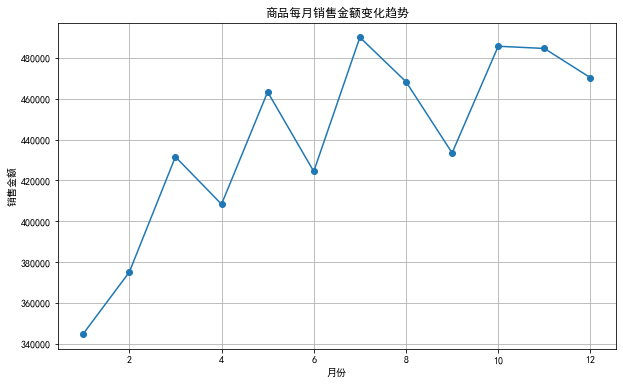

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')  # 修正marker符号
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
plt.title('商品每月销售金额变化趋势')
plt.xlabel('月份')
plt.ylabel('销售金额')
plt.grid(True)  # 显示网格
plt.show()

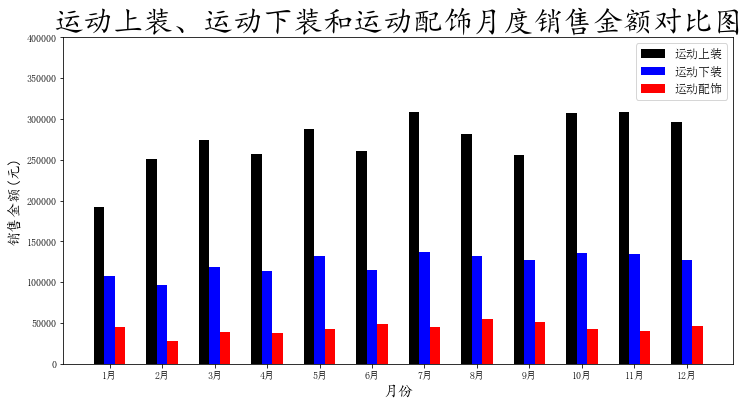

In [13]:
data_all_2 = df.groupby(by=['月份', '商品大类'], as_index=False)['销售金额'].sum()
list1 = data_all_2[data_all_2['商品大类'] == '运动上装']
list2 = data_all_2[data_all_2['商品大类'] == '运动下装']
list3 = data_all_2[data_all_2['商品大类'] == '运动配饰']
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 6))
x = list1['月份']
y1 = list1['销售金额']
y2 = list2['销售金额']
y3 = list3['销售金额']
plt.bar(x - 0.2, y1, width=0.2, color='k', label='运动上装')
plt.bar(x, y2, width=0.2, color='b', label='运动下装')
plt.bar(x + 0.2, y3, width=0.2, color='r', label='运动配饰')
plt.title(label='运动上装、运动下装和运动配饰月度销售金额对比图', font='KaiTi', fontsize=30, color='k', loc='center')
plt.xlabel('月份', font='KaiTi', fontsize=15, color='k', labelpad=5)
plt.ylabel('销售金额(元)', font='KaiTi', fontsize=15, color='k', labelpad=5)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(x, ['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月'])
plt.ylim(0, 400000)
plt.show()